In [1]:
# kernel"BASE python 3.11.7"(conda env)
import numpy as np
import os



In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rasagna.g\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import nltk
import pickle
import warnings
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.pipeline import Pipeline    
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("spam_sms.csv", encoding='utf-8')
# \U considers it as start of unicode sequence(in \Users) just directly use the csv file name, trust.

In [5]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
df.duplicated().value_counts()

False    5169
True      403
Name: count, dtype: int64

In [8]:
df=df.drop_duplicates()

In [9]:
np.shape(df)

(5169, 2)

In [10]:
df=df.rename(columns = {"v1":"Target","v2":"SMS"})

In [11]:
df.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


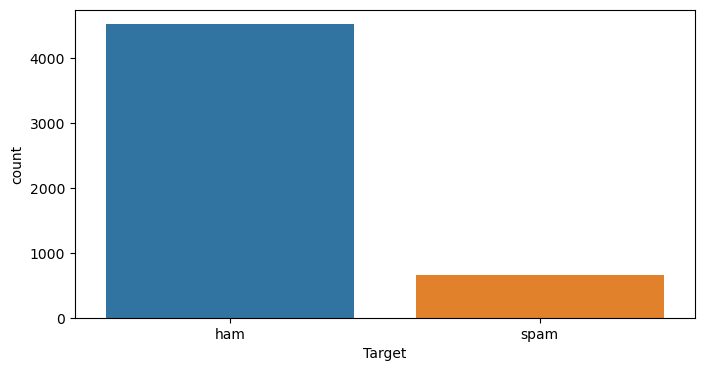

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Target')

plt.show()


In [13]:
#no of chars
#no of words
#no of sentences

In [14]:
df['characters']= df['SMS'].apply(len)

In [15]:
df['sentences']=df['SMS'].apply(lambda corpus: nltk.sent_tokenize(corpus)).apply(len)

In [16]:
df['Words'] = df["SMS"].apply(lambda document: nltk.word_tokenize(document)).apply(len)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
sentences,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0
Words,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0


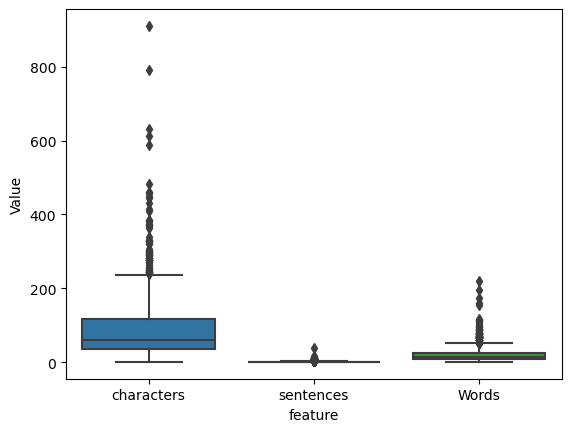

In [18]:
df_wcs= df.melt(id_vars='Target', value_vars=['characters','sentences','Words'],var_name='feature',value_name='Value')
sns.boxplot(x='feature',y='Value',data=df_wcs)
plt.show()

In [19]:
df_wcs.head()

,Target,feature,Value
0,ham,characters,111
1,ham,characters,29
2,spam,characters,155
3,ham,characters,49
4,ham,characters,61


DATA CLEANING (of SMS field)

In [20]:
def clean_data(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    text=str.lower(text)
    text = text.split()
    text=' '.join(text)
    return text


In [21]:
df['clean_text']=df['SMS'].apply(clean_data)

In [22]:
print(df['clean_text'].head())

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: clean_text, dtype: object


tokenization

In [23]:
from nltk.tokenize import word_tokenize
df['tokenized_SMS'] =df['clean_text'].apply(word_tokenize)

In [24]:
df['tokenized_SMS'].head()

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: tokenized_SMS, dtype: object

In [25]:
def stopword_rem(tokens):
    stop_words = set(stopwords.words('english'))
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rasagna.g\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df['filtered token'] = stopword_rem(df['tokenized_SMS'])

In [28]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
nltk.download('wordnet')

from nltk.corpus import wordnet
# from nltk.corpus import('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rasagna.g\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
synonyms = wordnet.synsets('example')
print(synonyms)

[Synset('example.n.01'), Synset('model.n.07'), Synset('exemplar.n.01'), Synset('example.n.04'), Synset('case.n.01'), Synset('exercise.n.04')]


In [31]:
lemmatizer = WordNetLemmatizer()


In [32]:
def lemmatizing(tokens):
    lemmas = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return lemmas

In [33]:
df['lemmatized']=df['filtered token'].apply(lemmatizing)

In [34]:
corpus=[]
for tokens in df['lemmatized']:
    document=' '.join([word for word in tokens])
    corpus.append(document)

In [35]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(corpus).toarray()

In [36]:
y=df['Target']

In [37]:
#
y=y.dropna()



In [38]:
X_train, X_test, y_train, y_test=train_test_split(X ,y,test_size=0.05,random_state=42)

In [39]:
model=MultinomialNB()
model.fit(X_train,y_train)



MultinomialNB()

In [40]:
y_predict=model.predict(X_test)

In [41]:
accuracy_score(y_test,y_predict)

0.972972972972973

In [42]:
pickle.dump(model,open('model.pkl','wb'))
model_1=pickle.load(open('model.pkl','rb'))

In [43]:
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))


In [44]:
# df.loc(df['Target']=='spam')


